# TorchServe At Work

---

In this notebook, we are going to explore the possibilities offered by **[TorchServe](https://github.com/pytorch/serve)** to serve the defect detection model we have built in previous notebooks.

TorchServe is an open source model server which was released last April and originated from both PyTorch and AWS teams work. It aims to provide a performant and lightweight model server that facilitates deploying and managing models in production environments (building bespoke prediction APIs, scaling them, securing them, etc).

Although yet experimental, this framework, officially supported and maintained by PyTorch and AWS communities, promises to offer a dedicated and production ready solution to serve PyTorch models (low latency prediction API, multi-model serving, model versioning for A/B testing, monitoring metrics, RESTful endpoints for application integration, etc), with nice-to-have flexibility to use it in various contexts (machine learning environments like Amazon SageMaker, container services, Amazon Elastic Compute Cloud (EC2), on-premise servers, etc).

---

## Serve trained Detectron2 model

After having installed TorchServe framework and construct a dedicated architecture (see below), we first archived the model as a MAR file thanks to the model archiver that is provided:

`torch-model-archiver --model-name severstal_detectron2 --version 1.0 --serialized-file model_archive/detectron2_model.pth --export-path model_store --handler model_archive/detectron2_handler.py`

Then, we started the service and began to serve the model:

`torchserve --start --ncs --model-store model_store --models severstal_detectron2.mar`

We checked that all is OK:

`curl http://localhost:8080/ping`

And finally, we ran some inferences:

`curl -X POST localhost:8080/predictions/severstal_detectron2/1.0 -F "data=@img_in_1.jpg" -o ../outputs/img_out_1.json`

`curl -X POST localhost:8080/predictions/severstal_detectron2/1.0 -F "data=@img_in_2.jpg" -o ../outputs/img_out_2.json`

Before to stop the service:

`torchserve --stop`

We can now visualize the results we have obtained.

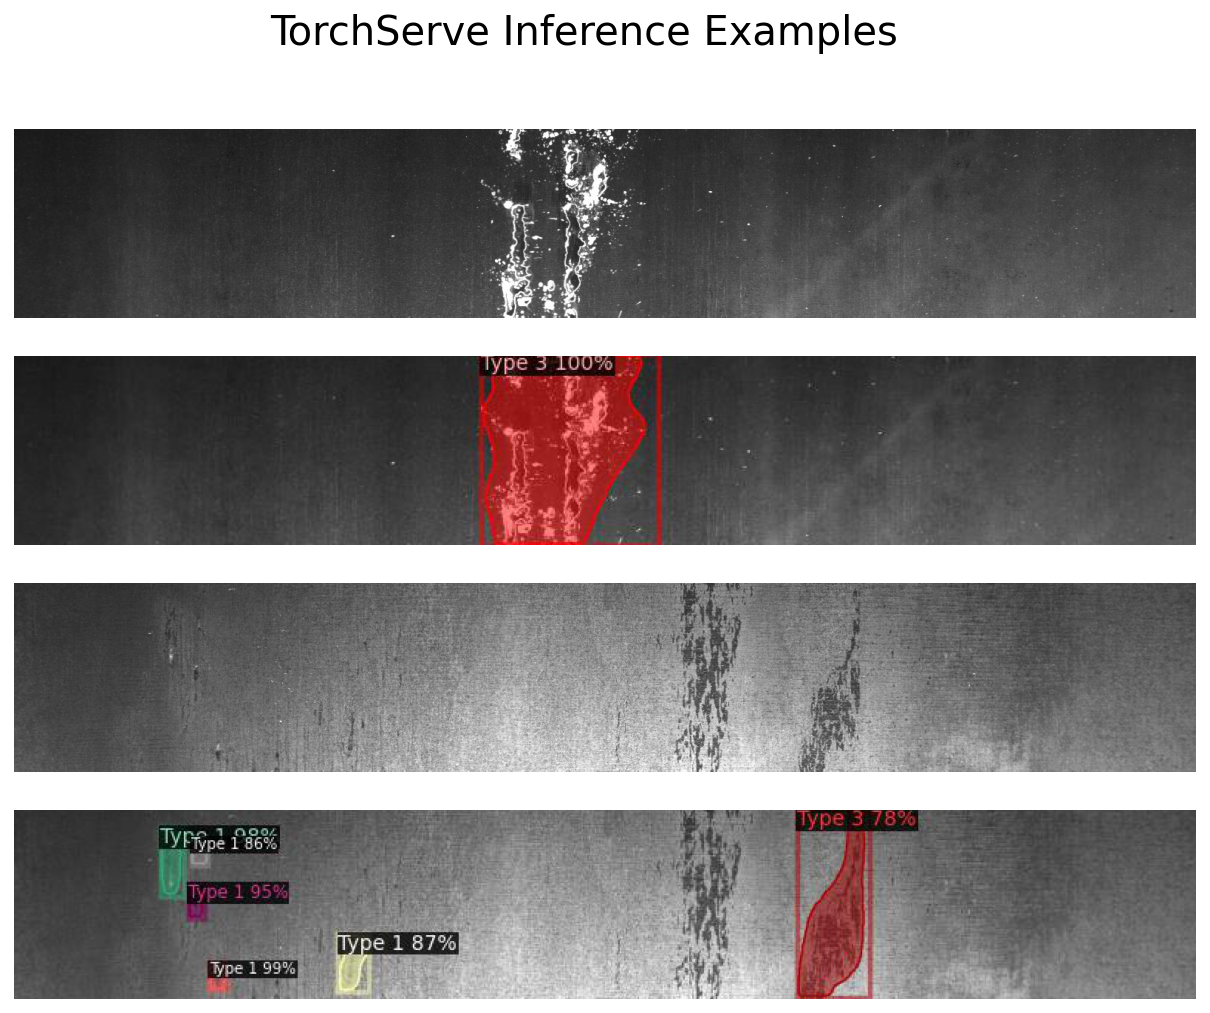

In [1]:
# Load needed packages and dedicated function to extract inference image from json response:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
from utils import gen_img_json_ts

# Get images from json responses:
gen_img_json_ts('../torchserve/outputs/img_out_1.json', '../torchserve/outputs/img_out_1.jpg')
gen_img_json_ts('../torchserve/outputs/img_out_2.json', '../torchserve/outputs/img_out_2.jpg')

# Display inference images:
img_in_1 = Image.open('../torchserve/inputs/img_in_1.jpg')
img_out_1 = Image.open('../torchserve/outputs/img_out_1.jpg')
img_in_2 = Image.open('../torchserve/inputs/img_in_2.jpg')
img_out_2 = Image.open('../torchserve/outputs/img_out_2.jpg')
fig, axes = plt.subplots(4, figsize=(12, 8))
fig.suptitle("TorchServe Inference Examples", fontsize=20)
axes[0].imshow(img_in_1)
axes[0].axis('off')
axes[1].imshow(img_out_1)
axes[1].axis('off')
axes[2].imshow(img_in_2)
axes[2].axis('off')
axes[3].imshow(img_out_2)
axes[3].axis('off')
fig.savefig('../graphs/torchserve_inference_examples.png', bbox_inches='tight')

---

## Server architecture

To conclude this notebook, we can visualize the architecture of the basic TorchServe-based server we have mobilized here:

In [2]:
!tree ../torchserve

../torchserve
├── inputs
│   ├── img_in_1.jpg
│   └── img_in_2.jpg
├── logs
│   ├── access_log.log
│   ├── model_log.log
│   ├── model_metrics.log
│   ├── ts_log.log
│   └── ts_metrics.log
├── model_archive
│   ├── detectron2_handler.py
│   └── detectron2_model.pth
├── model_store
│   └── severstal_detectron2.mar
└── outputs
    ├── img_out_1.jpg
    ├── img_out_1.json
    ├── img_out_2.jpg
    └── img_out_2.json

5 directories, 14 files
